In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

import sys
sys.path.append("../")
from create_spec import create_spec
from fit2gauss import fit2gauss

In [2]:
# import arrays
s = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/f1_h20.txt', dtype=int)
e = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/f1_h20_err.txt', dtype=int)

In [3]:
# wavelengths
line = 1403.
ll = np.arange(line-10,line+10,0.01)

In [4]:
N = s.shape[0] # len of array (in steps of 2s)

In [5]:
v_r = np.zeros(N)
v_b = np.zeros(N)
w_r = np.zeros(N)
w_b = np.zeros(N)

# v_r02 = np.zeros(N)
# v_b02 = np.zeros(N)
# w_r02 = np.zeros(N)
# w_b02 = np.zeros(N)

for i in range(0,N):

    print('i = ',i)
    
    wav = ll
    
    spec = s[i,:]
    #spec02 = s02[i,:]
    
    error = e[i,:]
    #error02 = e02[i,:]

    res = fit2gauss(wav,spec,error)
    #res02 = fit2gauss(wav,spec02,error02)
    a2g = res["a2g"] # extract fit parameters
    #a2g_02 = res02["a2g"]

    #calculate Doppler velocities and wavelengths
    line = 1403.
    c = 300.
    freq = c/line*1e3

    if a2g[1] < a2g[4]:
        v_b[i] = (a2g[1]-line)/line*3e5 # in km/s
        v_r[i] = (a2g[4]-line)/line*3e5

        w_b[i] = a2g[2]*freq
        w_r[i] = a2g[5]*freq

    else:
        v_r[i] = (a2g[1]-line)/line*3e5 # in km/s
        v_b[i] = (a2g[4]-line)/line*3e5

        w_r[i] = a2g[2]*freq
        w_b[i] = a2g[5]*freq

        
#     if a2g_02[1] < a2g_02[4]:
#         v_b02[i] = (a2g_02[1]-line)/line*3e5 # in km/s
#         v_r02[i] = (a2g_02[4]-line)/line*3e5

#         w_b02[i] = a2g_02[2]*freq
#         w_r02[i] = a2g_02[5]*freq

#     else:
#         v_r02[i] = (a2g_02[1]-line)/line*3e5 # in km/s
#         v_b02[i] = (a2g_02[4]-line)/line*3e5

#         w_r02[i] = a2g_02[2]*freq
#         w_b02[i] = a2g_02[5]*freq

    
    

i =  0
iss = [0 1 2 3]
i =  1
iss = [0 1 2]
i =  2
iss = [0 1]
i =  3
i =  4
i =  5
iss = [0 1 2]
i =  6
iss = [0]
i =  7
iss = [0]
i =  8
iss = [0]
i =  9
iss = [0]
i =  10
iss = [0]
i =  11
iss = [0]
i =  12
iss = [0]


../fit2gauss.py:98: RuntimeWarning: divide by zero encountered in true_divide
  X2one = np.sum(((y_modelone - y) / yerr)**2)
../fit2gauss.py:98: RuntimeWarning: invalid value encountered in true_divide
  X2one = np.sum(((y_modelone - y) / yerr)**2)
../fit2gauss.py:164: RuntimeWarning: divide by zero encountered in true_divide
  X2two = np.sum(((y_modeltwo - y) / yerr)**2)
../fit2gauss.py:164: RuntimeWarning: invalid value encountered in true_divide
  X2two = np.sum(((y_modeltwo - y) / yerr)**2)


i =  13
iss = [0]
i =  14
iss = [0]
i =  15
iss = [0]
i =  16
iss = [0]
i =  17
iss = [0]
i =  18
iss = [0]
i =  19
iss = [0]


In [10]:
time = np.arange(0,40,2)

(0, 140)

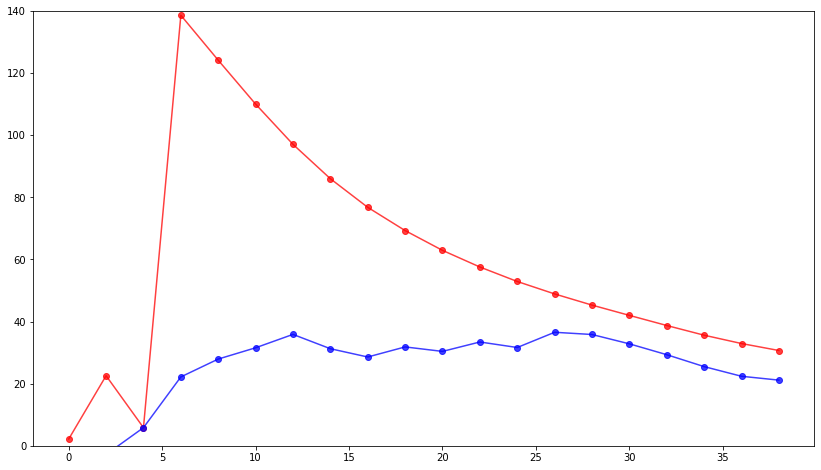

In [11]:
plt.figure(figsize=(14,8))
plt.plot(time,v_r,'r',alpha=0.75,marker='o')
plt.plot(time,v_b,'b',alpha=0.75,marker='o')
plt.ylim(0,140)

(0, 45)

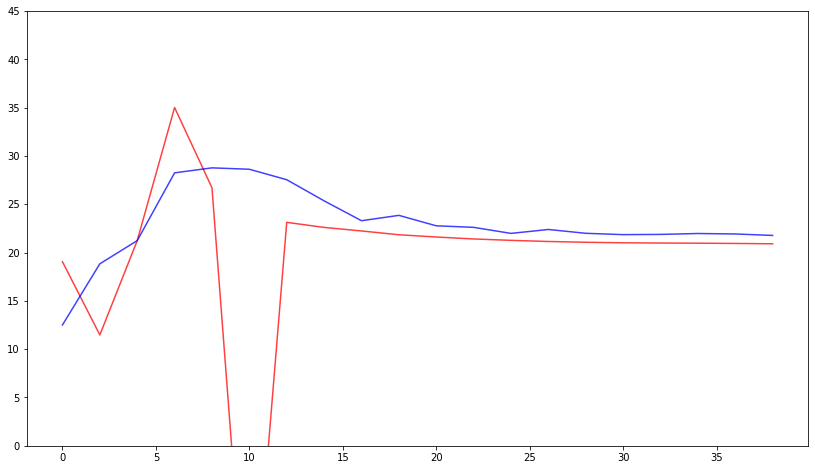

In [12]:
plt.figure(figsize=(14,8))
plt.plot(time,w_r,'r',alpha=0.75)
plt.plot(time,w_b,'b',alpha=0.75)
plt.ylim(0,45)

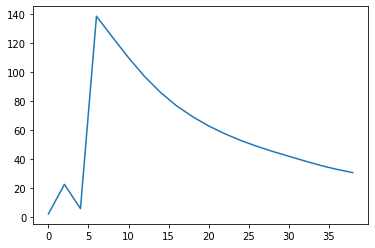

In [13]:
plt.plot(time,v_r)

In [14]:
vr = v_r[9:]
vb = v_b[9:]
wr = w_r[9:]
wb = w_b[9:]

In [15]:
#iis = np.where(np.logical_and(vr > 0, vr < 600))
iis = np.where(np.logical_and(vb > 0, vr < 600))
iis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),)

In [16]:
vr = vr[iis]
vb = vb[iis]
wr = wr[iis]
wb = wb[iis]

y=0.023411x+(20.091250)
y=0.040047x+(21.063426)


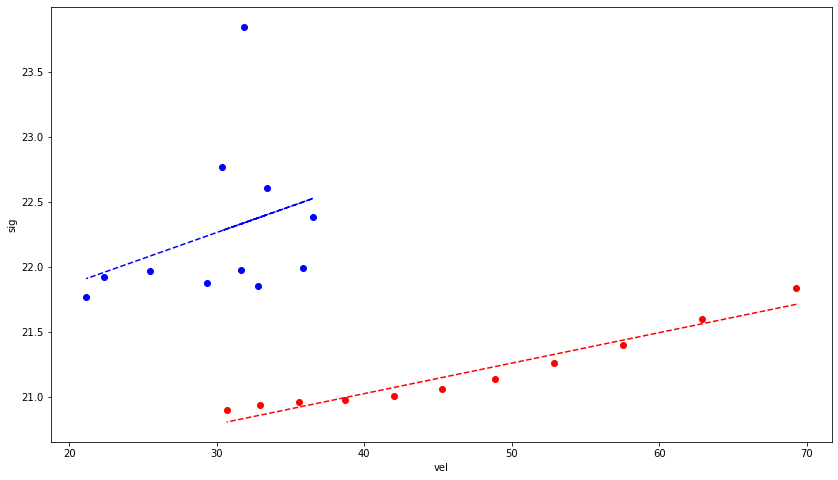

In [19]:
plt.figure(figsize=(14,8))
plt.plot(vr,wr,'o',color='red')
plt.plot(vb,wb,'o',color='blue')
plt.xlabel('vel')
plt.ylabel('sig')

# calc the trendline
z = np.polyfit(vr, wr, 1)
p = np.poly1d(z)
plt.plot(vr,p(vr),"r--")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

z1 = np.polyfit(vb, wb, 1)
p1 = np.poly1d(z1)
plt.plot(vb,p1(vb),"b--")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z1[0],z1[1]))

In [20]:
js = np.where(np.logical_and(v_b > 0, v_r < 600))

In [21]:
v_r = v_r[js]
v_b = v_b[js]
w_r = w_r[js]
w_b = w_b[js]

Text(0, 0.5, 'sig')

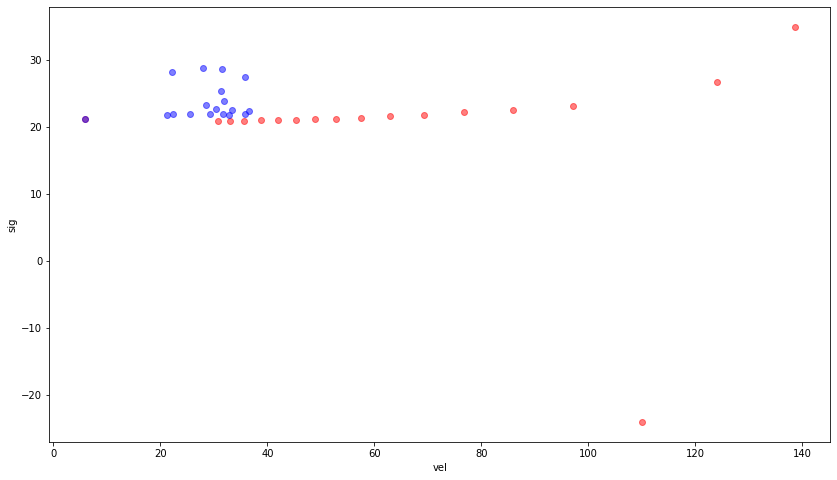

In [22]:
plt.figure(figsize=(14,8))
plt.plot(v_r,w_r,'o',color='red',alpha = 0.5)
plt.plot(v_b,w_b,'o',color='blue',alpha = 0.5)
plt.xlabel('vel')
plt.ylabel('sig')


1

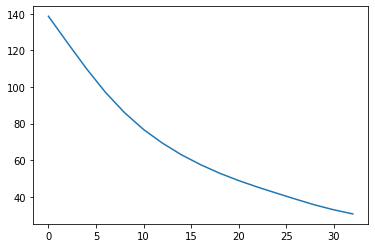

In [23]:
jj = np.where(v_r==np.max(v_r))
jj=jj[0][0]
red = v_r[jj:]
t = np.arange(0,2*len(red),2)
plt.plot(t,red)
jj

In [24]:
def fit_func(x,*a):
    ret=a[0]*np.exp(-(x*a[1])**a[2])
    return ret

a0 = [np.max(red),1/20,1]

In [25]:
p,p_cov = curve_fit(fit_func, t, red, p0=a0)

tau =  18.83279886120656


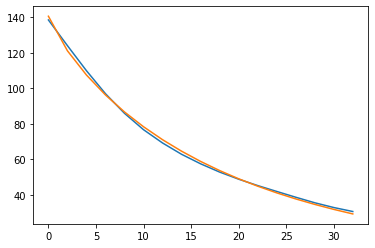

In [26]:
plt.plot(t,red)
plt.plot(t,fit_func(t,*p))
print('tau = ',1/p[1])